## $\color{red}{\text{Lecture Overview}}$
1. **Classification Techniques**
2. **Decision Trees and Random Forests**
2. **Developing the Analytic Task**
3. **Data Transformation**
4. **Data Modeling**
5. **Model Comparison**

## $\color{red}{\text{Support Vector Machines (SVMs)}}$

### $\color{blue}{\text{An Intuition}}$
1. Data points can be separated using a line, called a **hyperplane**
2. Data points on either side of the separation belong to different class
3. Challenge - derive equation of the hyperplane
    - $H=mx+b$

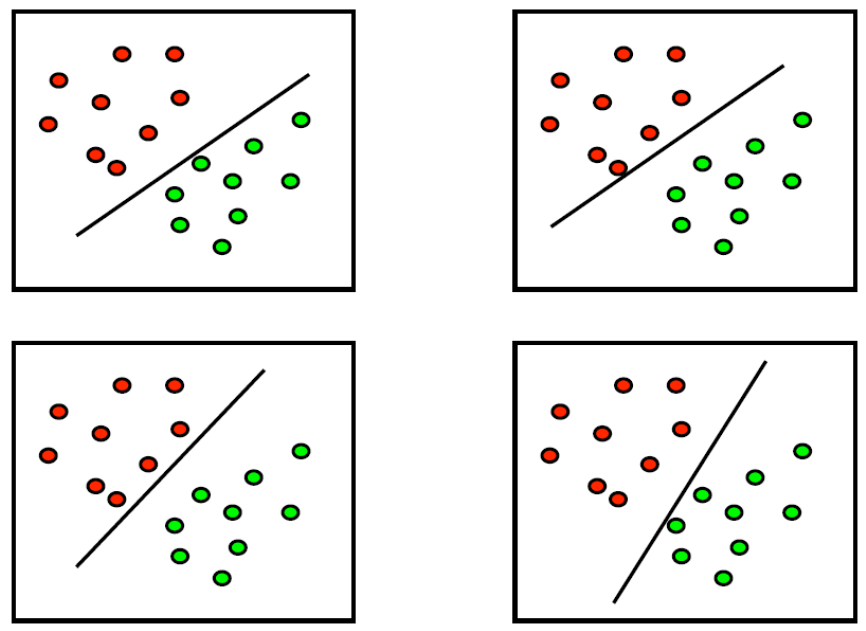

The SVM assumes that data is 2D. With higher-dimensional data, you have to reduce it to create this hyperplane.

Additionally, the data must be separable by a line. If this doesn't work with Euclidean geometry, you can use something called a kernel function to transform the space to make the points separable by a line. This is called **kernel space**.

## $\color{red}{\text{Import Required Packages}}$

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

## $\color{red}{\text{Import Data}}$

In [5]:
bank_df = pd.read_csv('/Users/dB/Documents/repos/github/bint-capstone/data-sources/UniversalBank.csv')

In [6]:
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## $\color{red}{\text{Analytic Task}}$
1. Using the bank_df data, build a **Decision Tree model** to predict **Personal Loan**
2. Perform data transformation methods wherever needed
3. Perform data visualization tasks to develop a preliminary understanding of **Personal Loan**
4. Develop a model to predict **Personal Loan**
5. Assess the robustness of the model
6. Interpret the model for insights
7. **Model Comparison**

## $\color{red}{\text{Data Transformation}}$

### $\color{blue}{\text{Deletion and Replacing}}$
1. Identify and remove ID and other variables that does not contribute to the models
2. Fix spaces in variable names
    - If a column name has a space, replace the space with an underscore (_)
3. Check to see if the procedures worked

In [8]:
# Delete the ID and ZIP code columns
drop_vars = ['ID', 'ZIP Code']
bank_new = bank_df.drop(drop_vars, axis=1)

# Replace space with underscore in column names
bank_new.columns = bank_new.columns.str.replace(' ', '_')
bank_new.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


### $\color{blue}{\text{Recoding}}$

1. Change the **Education** variable to be type "category"
    - Some variables appear numeric but they are not
2. Rename the values (1,2,3) of the **Education** variable to the following:
    - 1 = Undergrad
    - 2 = Graduate
    - 3 = Professional
3. View the first five (5) observations of the data

In [9]:
# Change "Education" column as categorical
bank_new['Education'] = bank_new['Education'].astype('category')

# Rename "Education" values of 1, 2 and 3 to "Undergrad", "Graduate" and "Professional"
categories = {1:'Undergrad', 2:'Graduate', 3:'Professional'}
bank_new['Education'] = bank_new.Education.cat.rename_categories(categories)

# First five observations
bank_new.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,Undergrad,0,0,1,0,0,0
1,45,19,34,3,1.5,Undergrad,0,0,1,0,0,0
2,39,15,11,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9,100,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,4,1.0,Graduate,0,0,0,0,0,1


### $\color{blue}{\text{Missing Value Analysis}}$

1. Check the extent to which variables have missing observations
2. If variables are missing, then imputation should be performed

In [10]:
# Function to compute missing values
def percent_missing(data):
    return data.isnull().sum().divide(len(data)).sort_values(ascending=False)

# Using the function
percent_missing(bank_new).head()

Age           0.0
Experience    0.0
Income        0.0
Family        0.0
CCAvg         0.0
dtype: float64

### $\color{blue}{\text{Data Partitioning}}$

1. Identify dependent and independent variables
2. Partition the data such that 80% is used for training and 20% is used for testing

In [11]:
from sklearn.model_selection import train_test_split

# Independent variables to be used in the model
dep_variable = bank_new['Personal_Loan']
ind_variable = bank_new.drop('Personal_Loan', axis=1)

# Partition data into training (80%) and testing (20%)
train_X, test_X, train_y, test_y = train_test_split(ind_variable, dep_variable, test_size=0.2, random_state=100)

### $\color{blue}{\text{Dummy Variables}}$
1. Replace categorical data with the mean of the dependent variable - rather than the standard dummy variable

In [16]:
from feature_engine.encoding import MeanEncoder

mean_enc = MeanEncoder().fit(train_X, train_y)

# Obtain new train and test data
new_train = mean_enc.transform(train_X)
new_test = mean_enc.transform(test_X)

## $\color{red}{\text{Data Modeling}}$

### $\color{blue}{\text{SVM}}$

1. Fit an SVM model on the training data

In [18]:
from sklearn.svm import SVC

svm = SVC(random_state=50).fit(new_train, train_y)

### $\color{blue}{\text{Logistic Regression}}$

1. Fit a logistic regression model on the **training data**
2. Print the **intercept** and model **coefficients**


In [19]:
from sklearn.linear_model import LogisticRegression

# Fit logistic regression
logit = LogisticRegression(solver='liblinear', random_state=0).fit(new_train, train_y)

### $\color{blue}{\text{Tree Based Models}}$

1. Fit a decision tree and random forest model to the training data

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Fit a decision tree and random forest classifier
dt = DecisionTreeClassifier(random_state=0, max_depth=3).fit(new_train, train_y)
rf = RandomForestClassifier(random_state=0, max_depth=3).fit(new_train, train_y)

## $\color{red}{\text{Variable Importance}}$
1. Obtain a plot of the important variables for random forest and decision tree model


Text(0.5, 1.0, 'Random Forest Important Variables')

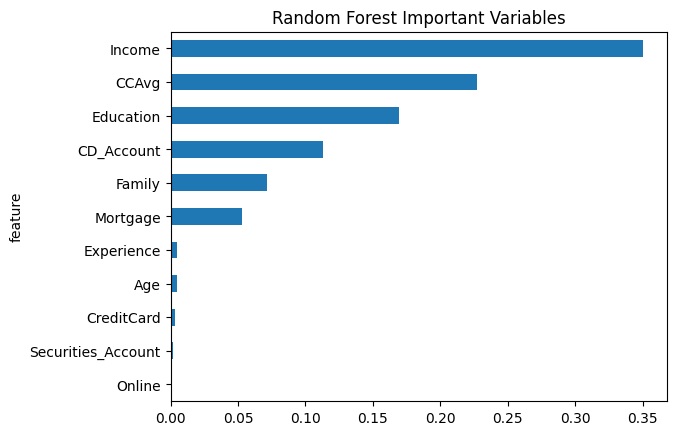

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

rf_importances = rf.feature_importances_
dt_importances = dt.feature_importances_

# Get important features
imp_rf_feats = pd.DataFrame({'feature':train_X.columns,
                            'rf_importance':rf_importances})

imp_dt_feats = pd.DataFrame({'feature':train_X.columns,
                            'dt_importance':dt_importances})

# sort variables according to feature importance score
imp_rf_features_sort = imp_rf_feats.sort_values(by='rf_importance',ascending=True)
imp_dt_features_sort = imp_dt_feats.sort_values(by='dt_importance',ascending=True)

# Plotting Importance Score
imp_rf_features_sort.plot(kind='barh',x='feature',legend=False)
plt.title('Random Forest Important Variables')


Text(0.5, 1.0, 'Decision Tree Important Variables')

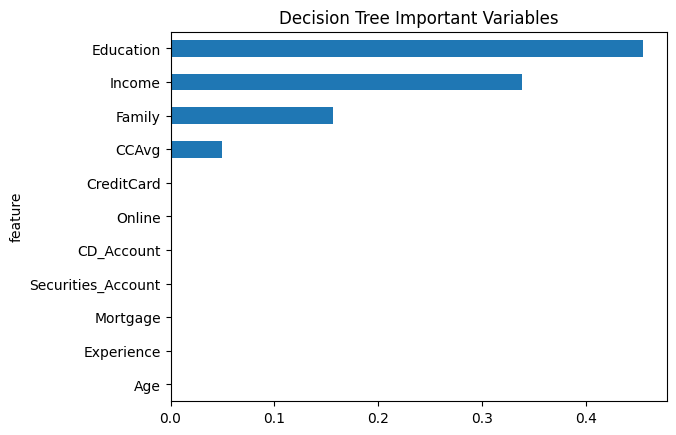

In [26]:
imp_dt_features_sort.plot(kind='barh',x='feature',legend=False)
plt.title('Decision Tree Important Variables')

### $\color{blue}{\text{Model Predictions}}$

1. Using the **testing data**, predict whether an individual will be approved for a **Personal_Loan**
  - This is prediction on unseen data

In [31]:
# get predictions for the SVM
svm_class = svm.predict(new_test)

# get prediction for logistic regression
logit_class = logit.predict(new_test)

# get prediction for tree based models
dt_class = dt.predict(new_test)
rf_class = rf.predict(new_test)

## $\color{red}{\text{Model Diagnostics on Testing Data}}$

### $\color{blue}{\text{Accuracy and Misclassification Rate}}$
1. Provide the model's accuracy rate - what does it tell you?
2. Provide the model's misclassification rate - what does it tell you?

In [35]:
from sklearn.metrics import accuracy_score

# Accuracy rate for models
svm_acc = accuracy_score(test_y, svm_class)
logit_acc = accuracy_score(test_y, logit_class)
dt_acc = accuracy_score(test_y, dt_class)
rf_acc = accuracy_score(test_y, rf_class)

# get misclassification rates
svm_misc = 1 - svm_acc
logit_misc = 1 - logit_acc
dt_misc = 1 - dt_acc
rf_misc = 1 - rf_acc

print("******************* ACCURACY RATES ***********************")
print('SVM: ', svm_acc)
print("Logistic regression: ", logit_acc)
print("Decision tree: ", dt_acc)
print("Random forest: ", rf_acc)

print("\n*******************  MISCLASSIFICATION RATES ***********************")
print(f'SVM: {svm_misc:.3f}')
print("Logistic regression: ", round(1 - logit_acc, 3))
print("Decision tree: ", round(1 - dt_acc, 3))
print("Random forest: ", round(1 - rf_acc, 3))

******************* ACCURACY RATES ***********************
SVM:  0.893
Logistic regression:  0.931
Decision tree:  0.983
Random forest:  0.945

*******************  MISCLASSIFICATION RATES ***********************
SVM: 0.107
Logistic regression:  0.069
Decision tree:  0.017
Random forest:  0.055


### $\color{blue}{\text{ROC Curve}}$
1. Provide the ROC curve and comment on it

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Calculate the AUC (Area Under Curve) of the ROC (Receiver Operating Characteristics) curve
logit_auc = roc_auc_score(test_y, logit_class)
dt_auc = roc_auc_score(test_y, dt_class)
rf_auc = roc_auc_score(test_y, rf_class)
svm_auc = roc_auc_score(test_y, svm_class)

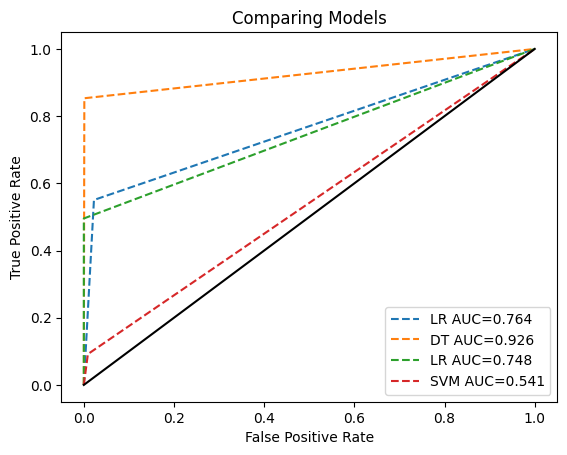

In [38]:
# Now plotting the ROC Curve.
# We'll need TPR (True positive rate) and FPR (false positive rate)
# TPR and FPR comes from the confusion matrix

logit_fpr, logit_tpr, _ = roc_curve(test_y, logit_class)
dt_fpr, dt_tpr, _ = roc_curve(test_y, dt_class)
rf_fpr, rf_tpr, _ = roc_curve(test_y, rf_class)
svm_fpr, svm_tpr, _ = roc_curve(test_y, svm_class)

# Plotting
plt.plot(logit_fpr, logit_tpr, linestyle='--', label="{}{:.3f}".format("LR AUC=", logit_auc))
plt.plot(dt_fpr, dt_tpr, linestyle='--', label="{}{:.3f}".format("DT AUC=", dt_auc))
plt.plot(rf_fpr, rf_tpr, linestyle='--', label="{}{:.3f}".format("LR AUC=", rf_auc))
plt.plot(svm_fpr, svm_tpr, linestyle='--', label="{}{:.3f}".format("SVM AUC=", svm_auc))
plt.plot([0,1], [0,1], linestyle='solid', c='k')

plt.title("Comparing Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

### $\color{blue}{\text{Learning Curves}}$
1. Provides an indication of overfitting or underfitting
  - Key idea: Can the model "hold its own" on new data

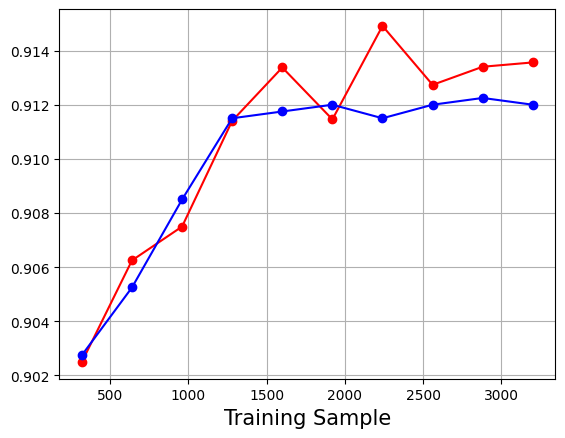

In [47]:
from sklearn.model_selection import learning_curve

size, train_scores, test_scores = learning_curve(estimator=svm, 
                                                 X=new_train, 
                                                 y=train_y, 
                                                 train_sizes=np.linspace(.1,1,10),cv=5,
                                                 n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(size, train_mean, color='r',marker='o',label='Train accuracy')
plt.plot(size, test_mean, color='b',marker='o',label='Train accuracy')
plt.xlabel('Training Sample', fontsize=15)
plt.grid()
plt.show()